In [3]:
import pandas as pd
import seaborn as sns


# Intro to the Olympic Medal Winner dataset


In [4]:
#Import the CSV and preview the dataset
#Link to CSV download source: https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data
#Dataset with Olympic medal winners since 1896 stored in a dataframe called oo
oo=pd.read_csv('olympics.csv', skiprows=4)
oo.head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


# Basic Plotting

## Plot the number of medals achieved by the Chinese team, (both men and women), in Beijing 2008 using Matplotlib and Seaborn

In [5]:
#chn08 will be the dataframe with all Chinese medal winners for 2008 Edition
chn08=oo[(oo.NOC=='CHN')&(oo.Edition==2008)]
#Preview to see that chn08 is correct
chn08.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
27180,Beijing,2008,Aquatics,Diving,"QIN, Kai",CHN,Men,3m springboard,M,Bronze
27181,Beijing,2008,Aquatics,Diving,"HE, Chong",CHN,Men,3m springboard,M,Gold


In [6]:
#Using Matplotlib

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2008 Beijing Olympics Chinese Medal Winners by gender

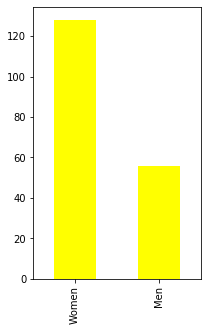

In [8]:
chn08.Gender.value_counts().plot(kind='bar', figsize=(3,5), color='yellow');

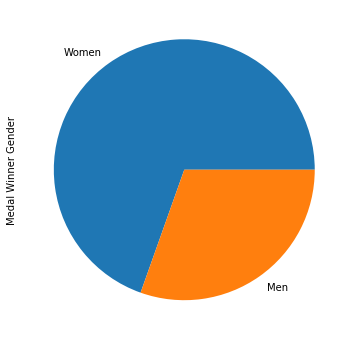

In [9]:
chn08.Gender.value_counts().plot(kind='pie', figsize=(6,6), label="Medal Winner Gender");

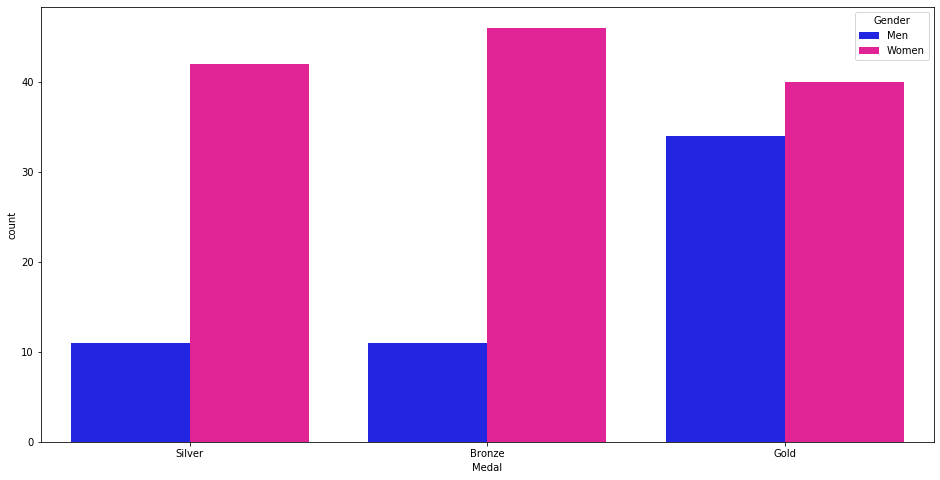

In [10]:
#Using Seaborn
#Array with colours for gender as hue
gender_colors = ["#0408FF", "#FF049b"]
# Set custom color palette
sns.set_palette(sns.color_palette(gender_colors))
plt.figure(figsize=(16,8))
sns.countplot(x='Medal', data=chn08, hue='Gender');

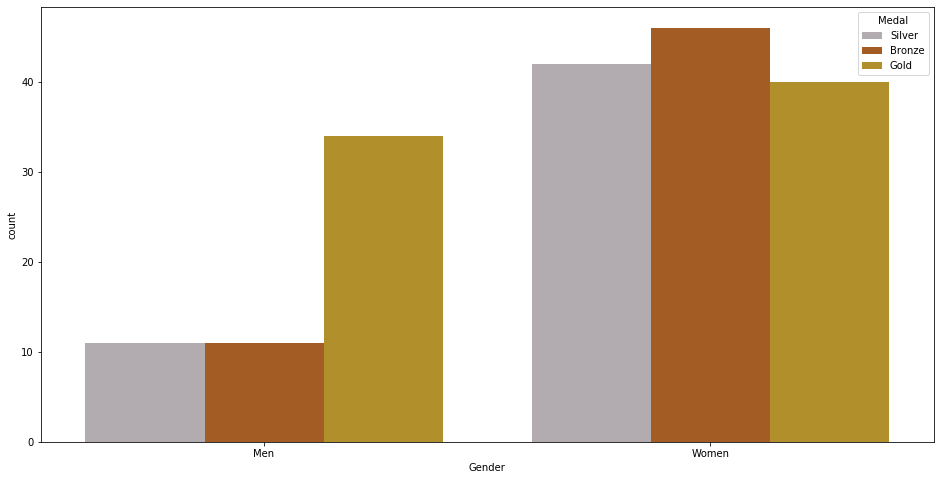

In [11]:
#Array with colours to represent different medals
medal_colors = ["#b3aaaf", "#b85b0f","#c79b16"]
# Set custom color palette
sns.set_palette(sns.color_palette(medal_colors ))
plt.figure(figsize=(16,8))
sns.countplot(x='Gender', data=chn08, hue='Medal');

## Plot the total number of medals awarded at each of the Olympic games throughout history

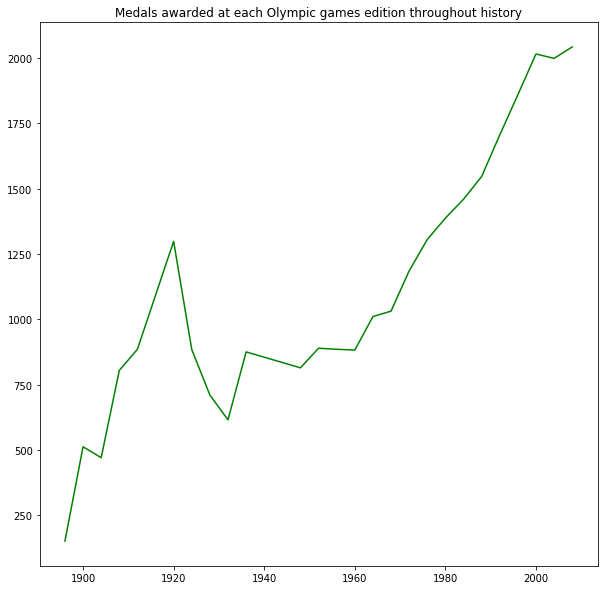

In [12]:
plt.xlabel="Edition"
total_medals=oo.Edition.value_counts().sort_index().plot(kind='line', figsize=(10,10), color='green', title="Medals awarded at each Olympic games edition throughout history");

## Which countries did not win a medal in the 2008 Olympics ?

In [34]:
#Winners08 is a dataset storing all countries that did win medals in 2008:
Winners08=oo[oo.Edition==2008]
#Preview
Winners08.head(10)
#See which countries won medals by NOC code and store in a series
Winners08=Winners08.NOC.value_counts()
Winners08

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
ECU      1
VIE      1
RSA      1
CHI      1
PAN      1
Name: NOC, Length: 86, dtype: int64

In [18]:
#Import a full list of all countries, so we can compare winners from 2008, store in cc dataframe:
cc=pd.read_csv('country_codes.csv')
#Preview
cc


,Country,Int Olympic Committee code,ISO code,Country.1
0,Afghanistan,AFG,AF,Afghanistan
1,Albania,ALB,AL,Albania
2,Algeria,ALG,DZ,Algeria
3,American Samoa*,ASA,AS,American Samoa*
4,Andorra,AND,AD,Andorra
...,...,...,...,...
196,Vietnam,VIE,VN,Vietnam
197,Virgin Islands*,ISV,VI,Virgin Islands*
198,Yemen,YEM,YE,Yemen
199,Zambia,ZAM,ZM,Zambia


In [19]:
#What is the difference between Country and Country.1 colums ?
cc[cc['Country']!=cc['Country.1']]


,Country,Int Olympic Committee code,ISO code,Country.1


In [20]:
#empty dataset returned, infer there is no difference

In [27]:
#Index cc by country codes and preview
cc.set_index('Int Olympic Committee code', inplace=True)

,Country,ISO code,Country.1
Int Olympic Committee code,,,
AFG,Afghanistan,AF,Afghanistan
ALB,Albania,AL,Albania
ALG,Algeria,DZ,Algeria
ASA,American Samoa*,AS,American Samoa*
AND,Andorra,AD,Andorra
...,...,...,...
VIE,Vietnam,VN,Vietnam
ISV,Virgin Islands*,VI,Virgin Islands*
YEM,Yemen,YE,Yemen


In [30]:
#Attach Winners08 series to cc dataframe
cc['Win08']=Winners08

In [32]:
#Find countries that did not win a medal
cc[cc['Win08'].isnull()]

,Country,ISO code,Country.1,Win08
Int Olympic Committee code,,,,
ALB,Albania,AL,Albania,NaN
ASA,American Samoa*,AS,American Samoa*,NaN
AND,Andorra,AD,Andorra,NaN
ANG,Angola,AO,Angola,NaN
ANT,Antigua and Barbuda,AG,Antigua and Barbuda,NaN
...,...,...,...,...
URU,Uruguay,UY,Uruguay,NaN
VAN,Vanuatu,VU,Vanuatu,NaN
ISV,Virgin Islands*,VI,Virgin Islands*,NaN
